# Text Classification with Naive Bayes, Logistic Regression and Fasttext

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
np.random.seed(17)
import matplotlib.pyplot as plt

In [2]:
classes = np.loadtxt('./data/classes.txt', dtype=str)
class_dict = {i+1:x for i, x in enumerate(classes)}
columns = ["CLASS", "TITLE", "DESCRIPTION"]
ag_new_train = pd.read_csv('./data/train.csv', header=None)
ag_new_train.columns = columns
ag_new_train.head()

,CLASS,TITLE,DESCRIPTION
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [3]:
df = pd.DataFrame(data=ag_new_train["TITLE"] + " " + ag_new_train["DESCRIPTION"], columns=["POST"])
df["LABEL"] = ag_new_train["CLASS"].map(class_dict)

In [4]:
df.head()

,POST,LABEL
0,Wall St. Bears Claw Back Into the Black (Reute...,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,Business
4,"Oil prices soar to all-time record, posing new...",Business


In [5]:
len(df)

120000

In [6]:
def print_plot(index):
    example = df[df.index == index][['POST', 'LABEL']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Label:', example[1])
print_plot(17)

In a Down Market, Head Toward Value Funds There is little cause for celebration in the stock market these days, but investors in value-focused mutual funds have reason to feel a bit smug -- if only because they've lost less than the folks who stuck with growth.
Label: Business


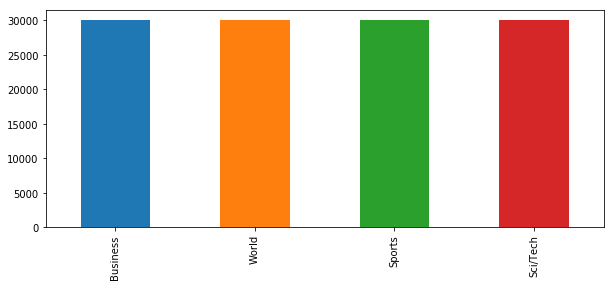

In [7]:
plt.figure(figsize=(10,4))
df["LABEL"].value_counts().plot(kind='bar');

In [8]:
ag_new_test = pd.read_csv('./data/test.csv', header=None)
ag_new_test.columns = columns
ag_new_test.head()

,CLASS,TITLE,DESCRIPTION
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [9]:
test_df = pd.DataFrame(data=ag_new_test["TITLE"] + " " + ag_new_test["DESCRIPTION"], columns=["POST"])
test_df["LABEL"] = ag_new_test["CLASS"].map(class_dict)

In [10]:
test_df.head()

,POST,LABEL
0,Fears for T N pension after talks Unions repre...,Business
1,The Race is On: Second Private Team Sets Launc...,Sci/Tech
2,Ky. Company Wins Grant to Study Peptides (AP) ...,Sci/Tech
3,Prediction Unit Helps Forecast Wildfires (AP) ...,Sci/Tech
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,Sci/Tech


In [11]:
len(test_df)

7600

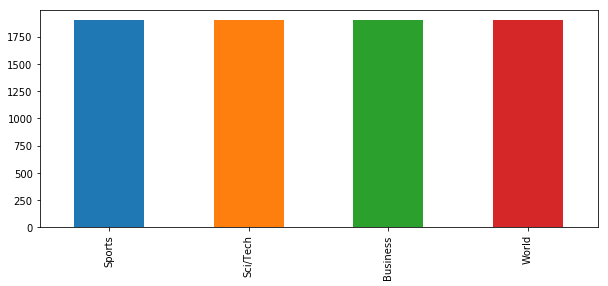

In [12]:
plt.figure(figsize=(10,4))
test_df["LABEL"].value_counts().plot(kind='bar');

In [13]:
pd.isnull(df['POST']).sum()

0

In [14]:
df["POST_LENGTH"] = df["POST"].map(len)
df["POST_NUM_WORDS"] = df["POST"].map(lambda x: len(x.split()))

In [15]:
df.head()

,POST,LABEL,POST_LENGTH,POST_NUM_WORDS
0,Wall St. Bears Claw Back Into the Black (Reute...,Business,144,21
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Business,266,36
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business,232,36
3,Iraq Halts Oil Exports from Main Southern Pipe...,Business,256,36
4,"Oil prices soar to all-time record, posing new...",Business,234,37


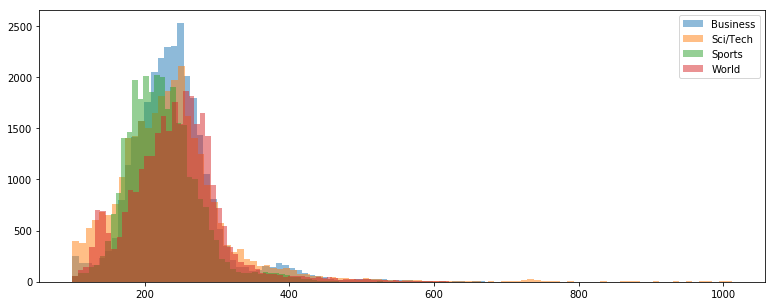

In [16]:
plt.figure(figsize=(13, 5))
for c in df.LABEL.unique():
    plt.hist(df[df.LABEL == c]["POST_LENGTH"], label=c, bins=100, alpha=0.5)
plt.legend()
plt.show()
plt.close()

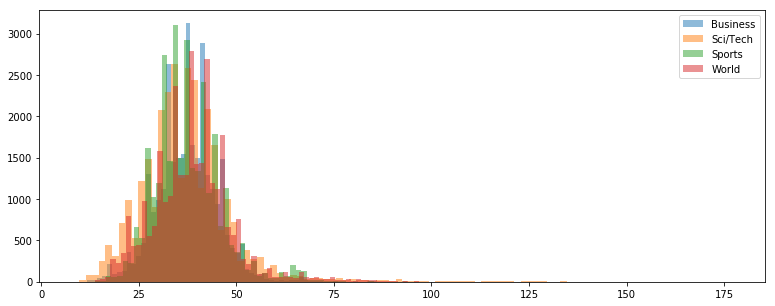

In [17]:
plt.figure(figsize=(13, 5))
for c in df.LABEL.unique():
    plt.hist(df[df.LABEL == c]["POST_NUM_WORDS"], label=c, bins=100, alpha=0.5)
plt.legend()
plt.show()
plt.close()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_val, y_train, y_val = train_test_split(df["POST"], df["LABEL"], 
                                                  test_size=len(test_df), random_state = 17, stratify = df["LABEL"])
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

print(X_train.shape, X_val.shape)

(112400,) (7600,)


# Count Vectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
CountVec = CountVectorizer(token_pattern='\w+', lowercase=False)

In [22]:
sample_data = [
    "the quick brown fox jumps.",
    "jumps over the lazy dog!",
    "the lazy dog and the quick fox."
]

index = ["Doc1", "Doc2", "Doc3"]

In [23]:
sample_counts = CountVec.fit_transform(sample_data)

In [24]:
pd.DataFrame(sample_counts.toarray(), columns=CountVec.get_feature_names(), index=index)

,and,brown,dog,fox,jumps,lazy,over,quick,the
Doc1,0,1,0,1,1,0,0,1,1
Doc2,0,0,1,0,1,1,1,0,1
Doc3,1,0,1,1,0,1,0,1,2


In [25]:
CountVectorizer()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

#### max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
#### max_df = 25 means "ignore terms that appear in more than 25 documents".
#### min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
#### min_df = 5 means "ignore terms that appear in less than 5 documents".

In [26]:
CountVec = CountVectorizer(token_pattern='\w+', lowercase=False, ngram_range=(1, 2), min_df=2)

In [27]:
sample_counts = CountVec.fit_transform(sample_data)

In [28]:
pd.DataFrame(sample_counts.toarray(), columns=CountVec.get_feature_names(), index=index)

,dog,fox,jumps,lazy,lazy dog,quick,the,the lazy,the quick
Doc1,0,1,1,0,0,1,1,0,1
Doc2,1,0,1,1,1,0,1,1,0
Doc3,1,1,0,1,1,1,2,1,1


In [29]:
len(X_train)

112400

In [30]:
for min_df in [1, 5, 10, 20, 50]:
    CountVec = CountVectorizer(lowercase=False, token_pattern='\w+', min_df=min_df)
    CountVec.fit(X_train)
    print("min_df={}, number_of_words: {}".format(min_df, len(CountVec.get_feature_names())))

min_df=1, number_of_words: 86045
min_df=5, number_of_words: 32443
min_df=10, number_of_words: 21890
min_df=20, number_of_words: 14492
min_df=50, number_of_words: 8109


In [31]:
for min_df in [1, 5, 10, 20, 50]:
    CountVec = CountVectorizer(lowercase=False, token_pattern='\w+', min_df=min_df, ngram_range=(1, 2))
    CountVec.fit(X_train)
    print("min_df={}, number_of_words: {}".format(min_df, len(CountVec.get_feature_names())))

min_df=1, number_of_words: 1375125
min_df=5, number_of_words: 154232
min_df=10, number_of_words: 75274
min_df=20, number_of_words: 38452
min_df=50, number_of_words: 16121


# Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [33]:
best_naive_bayes_score, best_naive_bayes_clf = 0, None

In [34]:
nb = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+')),
               ('clf', MultinomialNB()),])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_val)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(nb.predict(X_train), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_naive_bayes_score:
    best_naive_bayes_score = val_score
    best_naive_bayes_clf = nb    

train accuracy 0.920
val accuracy 0.906



In [35]:
nb = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2))),
               ('clf', MultinomialNB()),])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_val)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(nb.predict(X_train), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_naive_bayes_score:
    best_naive_bayes_score = val_score
    best_naive_bayes_clf = nb    

train accuracy 0.954
val accuracy 0.915



In [36]:
nb = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 3))),
               ('clf', MultinomialNB()),])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_val)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(nb.predict(X_train), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_naive_bayes_score:
    best_naive_bayes_score = val_score
    best_naive_bayes_clf = nb    

train accuracy 0.971
val accuracy 0.916



# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
best_log_reg_score, best_log_reg_clf = 0, None

In [39]:
logreg = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+')),
                   ('clf', LogisticRegression(n_jobs=-2, solver="lbfgs", random_state=42)),])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(logreg.predict(X_train), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_log_reg_score:
    best_log_reg_score = val_score
    best_log_reg_clf = logreg    

train accuracy 0.977
val accuracy 0.917



In [40]:
logreg = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2))),
                   ('clf', LogisticRegression(n_jobs=-2, solver="lbfgs", random_state=42)),])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(logreg.predict(X_train), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_log_reg_score:
    best_log_reg_score = val_score
    best_log_reg_clf = logreg    

train accuracy 1.000
val accuracy 0.924



# TF-IDF

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
TFIDF = TfidfVectorizer(token_pattern='\w+', lowercase=False)

In [43]:
sample_tf_counts = TFIDF.fit_transform(sample_data)

In [44]:
pd.DataFrame(sample_tf_counts.toarray(), columns=TFIDF.get_feature_names(), index=index).round(2)

,and,brown,dog,fox,jumps,lazy,over,quick,the
Doc1,0.00,0.57,0.00,0.43,0.43,0.00,0.00,0.43,0.34
Doc2,0.00,0.00,0.43,0.00,0.43,0.43,0.57,0.00,0.34
Doc3,0.46,0.00,0.35,0.35,0.00,0.35,0.00,0.35,0.54


In [45]:
nb = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2))),
               ('clf', MultinomialNB()),])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_val)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(nb.predict(X_train), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_naive_bayes_score:
    best_naive_bayes_score = val_score
    best_naive_bayes_clf = nb

train accuracy 0.939
val accuracy 0.912



In [46]:
logreg = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2))),
                   ('clf', LogisticRegression(n_jobs=-2, solver="lbfgs", random_state=42)),])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(logreg.predict(X_train), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_log_reg_score:
    best_log_reg_score = val_score
    best_log_reg_clf = logreg

train accuracy 0.949
val accuracy 0.915



In [47]:
from fastText import train_supervised

def to_fasttext_format(data: list, labels: list, save_path: str=None):
    ft_data = []
    for d, l in zip(data, labels):
        ft_data.append("__label__{} {}".format(l, d))
    if save_path:
        np.savetxt(save_path, ft_data, fmt='%s')
    else:
        return ft_data
    
def train_fasttext(X_train, y_train, wordNgrams=1, minCount=1, ft_train_path="./data/tmp_train.txt"):
    to_fasttext_format(X_train, y_train, save_path=ft_train_path)
    ft_model = train_supervised(ft_train_path, wordNgrams=wordNgrams, minCount=minCount, epoch=10, loss="ns")
    train_preds = [i[0].split('_')[-1] for i in ft_model.predict(list(X_train))[0]]    
    print('train accuracy {0:,.3f}'.format(accuracy_score(train_preds, y_train)))
    
    return ft_model

In [48]:
best_fasttext_score, best_fasttext_clf = 0, None

In [49]:
ft_model = train_fasttext(X_train, y_train)
val_preds = [i[0].split('_')[-1] for i in ft_model.predict(list(X_val))[0]]
val_score = accuracy_score(val_preds, y_val)
print('val accuracy {0:,.3f}'.format(val_score))

if val_score > best_fasttext_score:
    best_fasttext_score = val_score
    best_fasttext_clf = ft_model    

train accuracy 0.987
val accuracy 0.920


In [50]:
ft_model = train_fasttext(X_train, y_train, wordNgrams=2)
val_preds = [i[0].split('_')[-1] for i in ft_model.predict(list(X_val))[0]]
val_score = accuracy_score(val_preds, y_val)
print('val accuracy {0:,.3f}'.format(val_score))

if val_score > best_fasttext_score:
    best_fasttext_score = val_score
    best_fasttext_clf = ft_model    

train accuracy 1.000
val accuracy 0.923


# text preprocessing

In [51]:
word_counts = {}
for post in X_train:
    for word in post.split():
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

In [52]:
top_k = 10
sorted(word_counts.items(), key=lambda t: t[1], reverse=True)[:top_k]

[('the', 166197),
 ('to', 110132),
 ('a', 92004),
 ('of', 91145),
 ('in', 86358),
 ('and', 63726),
 ('on', 51716),
 ('for', 45375),
 ('-', 36660),
 ('#39;s', 28912)]

In [53]:
from nltk.corpus import stopwords

In [54]:
stop_words = set(stopwords.words('english'))

In [55]:
cnt = 0
for w, c in sorted(word_counts.items(), key=lambda t: t[1], reverse=True):
    if w.lower() not in stop_words:
        print(w, c)
        cnt += 1
        if cnt == top_k:
            break

- 36660
#39;s 28912
said 15430
(Reuters) 12037
US 10821
new 9568
(AP) 7772
first 7664
-- 7400
AP 7295


In [56]:
def get_sample_with(data, expr, size=5, with_spaces=True):
    try:
        if with_spaces:
            [print(i, end='\n\n') for i in np.random.choice([i for i in data if ' {} '.format(expr) in i], size)]
        else:
            [print(i, end='\n\n') for i in np.random.choice([i for i in data if expr in i], size)]
    except:
        return "no such examples"

In [57]:
get_sample_with(X_train, " #39;", with_spaces=False, size=3)

It #39;s the Occupation, Stupid Four years ago on Sept. 28, 2000, when Ariel Sharon made his operatic visit to the Temple Mount, no one could have predicted how dire the situation would become so quickly: close to 6,000 dead; the building 

No place for Anelka or Silvestre in Domenech #39;s squad to face &lt;b&gt;...&lt;/b&gt; France coach Raymond Domenech named his 20-man squad Thursday for upcoming 2006 World Cup qualifying matches against Israel and the Faroe Islands.

Compensation plan for 27,000 Pinochet victims Chile #39;s government is to seek congressional approval to compensate more than 27,000 victims of political imprisonment and torture at the hands of the country #39;s rightwing military regime, which ruled from 1973 to 1990.



In [58]:
get_sample_with(X_train, "--", with_spaces=False, size=3)

Technology NEW HAVEN, Conn. -- Slower growth and reduced profits will likely squeeze three of the nation #39;s top 10 personal computer manufacturers out of the market by 2007, a research firm predicted Monday.

Gerrard stars in dramatic comeback LIVERPOOL, England -- Steven Gerrard crashed home a stunning half-volley as four-times European champions Liverpool came back to beat Olympiakos Piraeus 3-1 on Wednesday and reach the Champions League knockout stage.

Chavez urges opposition to recognize results of referendum CARACAS, August 22 (Itar-Tass) -- President of Venezuela Hugo Chavez has called on the opposition to recognize the results of a referendum on confidence in the president held on August 15.



In [59]:
sorted(word_counts.items(), key=lambda t: t[1])[:top_k]

[('replied,', 1),
 ('mugshots', 1),
 ('few\\days', 1),
 ('"As', 1),
 ('CONTRADICTING', 1),
 ("Tennis's", 1),
 ("Light'", 1),
 ('YUKOY),', 1),
 ('quot;Solution', 1),
 ('peels', 1)]

In [60]:
sorted(word_counts.keys())[:top_k]

['!',
 '!!?\\\\&lt;Bush&gt;',
 '!!\\\\&lt;Bush&gt;',
 '!).',
 '!K7',
 '"',
 '"\'CSI\'',
 '".jobs"',
 '".md"',
 '".mobi"']

In [61]:
CountVec = CountVectorizer(token_pattern='\w+', lowercase=False)
CountVec.fit(X_train)
len(CountVec.get_feature_names())

86045

In [62]:
import re

In [63]:
letters_numbers = re.compile(r'[a-zA-Z0-9]+')

In [64]:
sample = X_train[3]
print(sample, end="\n\n")
print(" ".join(letters_numbers.findall(sample)))

Business Briefs Markel Corp. said yesterday that state insurance departments had issued document requests or administrative subpoenas to several of its subsidiaries related to producer compensation arrangements.

Business Briefs Markel Corp said yesterday that state insurance departments had issued document requests or administrative subpoenas to several of its subsidiaries related to producer compensation arrangements


In [65]:
X_train_prep = []
for desc in X_train:
    only_letter_words = letters_numbers.findall(desc)
    only_letter_desc = " ".join(only_letter_words)
    only_letter_desc = only_letter_desc.lower()
    X_train_prep.append(only_letter_desc)
X_train_prep = np.array(X_train_prep)

In [66]:
CountVec = CountVectorizer(token_pattern='\w+')
CountVec.fit(X_train_prep)
words = np.array(CountVec.get_feature_names())
len(words)

63502

In [67]:
words[:top_k]

array(['0', '00', '000', '000016447', '00010563n', '0002', '0004287',
       '0005173miami050', '000660', '0009875buffalo040'], dtype='<U38')

In [68]:
word_counts = {}
for post in X_train_prep:
    for word in post.split():
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

In [69]:
sorted(word_counts.items(), key=lambda t: t[1], reverse=True)[:top_k]

[('the', 192427),
 ('to', 113067),
 ('a', 106283),
 ('of', 92335),
 ('in', 90470),
 ('and', 65250),
 ('s', 58082),
 ('on', 54084),
 ('for', 47500),
 ('39', 41571)]

In [70]:
sorted(word_counts.items(), key=lambda t: t[1])[:top_k]

[('mugshots', 1),
 ('scandinavia', 1),
 ('jumpdrive', 1),
 ('ineligibility', 1),
 ('servicemaster', 1),
 ('3379', 1),
 ('vianna', 1),
 ('depravity', 1),
 ('fryer', 1),
 ('estwithin', 1)]

In [71]:
cnt = 0
for w, c in sorted(word_counts.items(), key=lambda t: t[1], reverse=True):
    if w.lower() not in stop_words:
        print(w, c)
        cnt += 1
        if cnt == top_k:
            break

39 41571
new 20052
said 18963
reuters 18185
ap 15271
gt 12457
lt 12411
us 12393
two 9610
first 9212


In [72]:
get_sample_with(X_train_prep, "gt", size=1)

before the bell sanderson farms falls new york reuters shares of sanderson farms inc lt a href http www investor reuters com fullquote aspx ticker safm o target stocks quickinfo fullquote gt safm o lt a gt sunk nearly 16 percent before the bell on tuesday after the chicken producer s quarterly earnings fell short of wall street estimates



In [73]:
get_sample_with(X_train, "gt", with_spaces=False, size=1)

Chirac names ally to replace rival THE French president promoted a staunch ally to replace a popular finance minister, strengthening his hand ahead of an expected struggle for the governing party #39;s 2007 presidential nomination.



In [74]:
from unidecode import unidecode
from nltk.stem import PorterStemmer

In [75]:
print(unidecode("C'est la première fois que deux équipes @"))
print(unidecode("водка"))
print(unidecode(u"北亰"))

C'est la premiere fois que deux equipes @
vodka
Bei Jing 


In [76]:
letters_numbers = re.compile(r'[a-zA-Z0-9]+')
stemmer = PorterStemmer()

def preprocess_text(text):
    text = unidecode(text)
    text = text.replace(' #39;', "'")
    text_words = letters_numbers.findall(text)
    text_words = [word for word in text_words if (word not in stop_words) or (len(word) > 2)]
    text_words = [stemmer.stem(word) for word in text_words]    
    text = " ".join(text_words)
    return text

In [77]:
sample_text = np.random.choice(X_train)
sample_text

'France #39;s Chirac says UK won nothing from Bush support LONDON: French President Jacques Chirac said in a newspaper interview yesterday that Britain has gained nothing from its support for the United States-led invasion of Iraq.'

In [78]:
preprocess_text(sample_text)

'franc chirac say UK won noth from bush support london french presid jacqu chirac said newspap interview yesterday that britain ha gain noth from it support for the unit state led invas iraq'

In [79]:
from tqdm import tqdm_notebook

In [80]:
X_train_prep2 = []
for desc in tqdm_notebook(X_train):
    X_train_prep2.append(preprocess_text(desc))
X_train_prep2 = np.array(X_train_prep2)

In [81]:
X_val_prep2 = []
for desc in tqdm_notebook(X_val):
    X_val_prep2.append(preprocess_text(desc))
X_val_prep2 = np.array(X_val_prep2)

In [82]:
nb = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+')),
               ('clf', MultinomialNB()),])
nb.fit(X_train_prep2, y_train)

y_pred = nb.predict(X_val_prep2)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(nb.predict(X_train_prep2), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_naive_bayes_score:
    print("text preprocessing improved result for naive bayes")
    print("don't forget to preprocess test data as well")
    best_naive_bayes_score = val_score
    best_naive_bayes_clf = nb

train accuracy 0.914
val accuracy 0.904



In [83]:
import time

In [84]:
start = time.time()
nb = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2))),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train_prep2, y_train)

y_pred = nb.predict(X_val_prep2)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(nb.predict(X_train_prep2), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_naive_bayes_score:
    print("text preprocessing improved result for naive bayes")
    print("don't forget to preprocess test data as well")
    best_naive_bayes_score = val_score
    best_naive_bayes_clf = nb
print("\ntook {0:.2f} seconds".format(time.time() - start))

train accuracy 0.940
val accuracy 0.915


took 26.29 seconds


In [85]:
logreg = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+')),
                   ('clf', LogisticRegression(n_jobs=-2, solver="lbfgs", random_state=42)),])
logreg.fit(X_train_prep2, y_train)

y_pred = logreg.predict(X_val_prep2)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(logreg.predict(X_train_prep2), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_log_reg_score:
    print("text preprocessing improved result for logistic regression")
    print("don't forget to preprocess test data as well")
    best_log_reg_score = val_score
    best_log_reg_clf = logreg

train accuracy 0.933
val accuracy 0.915



In [86]:
start = time.time()
logreg = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2))),
                   ('clf', LogisticRegression(n_jobs=-2, solver="lbfgs", random_state=42)),])
logreg.fit(X_train_prep2, y_train)

y_pred = logreg.predict(X_val_prep2)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(logreg.predict(X_train_prep2), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_log_reg_score:
    print("text preprocessing improved result for logistic regression")
    print("don't forget to preprocess test data as well")
    best_log_reg_score = val_score
    best_log_reg_clf = logreg
print("\ntook {0:.2f} seconds".format(time.time() - start))

train accuracy 0.947
val accuracy 0.917


took 89.20 seconds


In [87]:
ft_model = train_fasttext(X_train_prep2, y_train, wordNgrams=1)
val_preds = [i[0].split('_')[-1] for i in ft_model.predict(list(X_val_prep2))[0]]
val_score = accuracy_score(val_preds, y_val)
print('val accuracy {0:,.3f}'.format(val_score))

if val_score > best_fasttext_score:    
    print("text preprocessing improved result for fasttext")
    print("don't forget to preprocess test data as well")
    best_fasttext_score = val_score
    best_fasttext_clf = ft_model

train accuracy 0.950
val accuracy 0.916


In [88]:
start = time.time()
ft_model = train_fasttext(X_train_prep2, y_train, wordNgrams=2)
val_preds = [i[0].split('_')[-1] for i in ft_model.predict(list(X_val_prep2))[0]]
val_score = accuracy_score(val_preds, y_val)
print('val accuracy {0:,.3f}'.format(val_score))

if val_score > best_fasttext_score:    
    print("text preprocessing improved result for fasttext")
    print("don't forget to preprocess test data as well")
    best_fasttext_score = val_score
    best_fasttext_clf = ft_model
print("\ntook {0:.2f} seconds".format(time.time() - start))

train accuracy 0.998
val accuracy 0.925
text preprocessing improved result for fasttext
don't forget to preprocess test data as well

took 24.10 seconds


# test data results

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,6), fontsize=10):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [90]:
test_df["POST_PREP"] = test_df["POST"].map(preprocess_text)

# Naive Bayes

In [92]:
round(best_naive_bayes_score, 3)

0.916

test accuracy 0.910



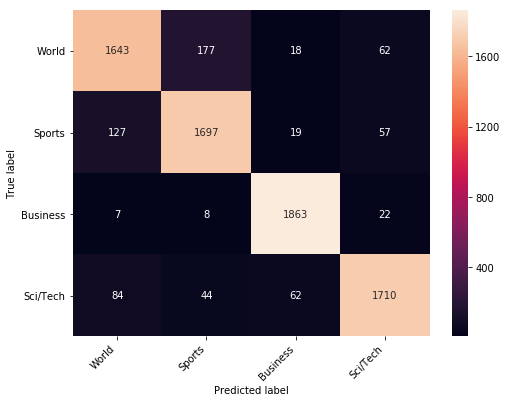

In [93]:
test_pred = best_naive_bayes_clf.predict(test_df["POST"])
print('test accuracy {0:,.3f}\n'.format(accuracy_score(test_pred, test_df["LABEL"])))
print_confusion_matrix(confusion_matrix(test_df["LABEL"], test_pred), class_names=classes)

# Logistic Regression

In [94]:
round(best_log_reg_score, 3)

0.924

test accuracy 0.925



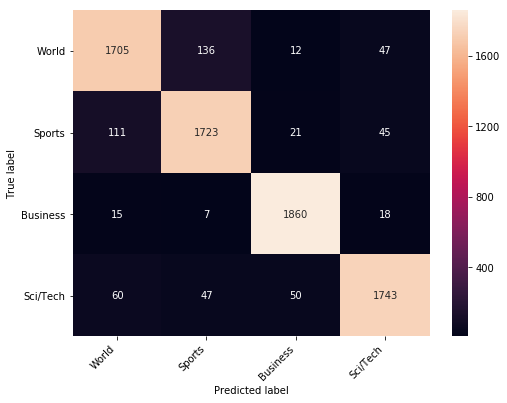

In [95]:
test_pred = best_log_reg_clf.predict(test_df["POST"])
print('test accuracy {0:,.3f}\n'.format(accuracy_score(test_pred, test_df["LABEL"])))
print_confusion_matrix(confusion_matrix(test_df["LABEL"], test_pred), class_names=classes)

# fasttext

In [96]:
round(best_fasttext_score, 3)

0.925

test accuracy 0.921



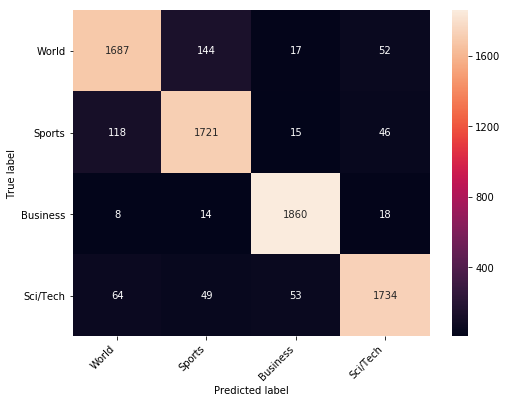

In [97]:
test_pred, _ = best_fasttext_clf.predict(list(test_df["POST_PREP"]))
test_pred = [i[0].split("_")[-1] for i in test_pred]
print('test accuracy {0:,.3f}\n'.format(accuracy_score(test_pred, test_df["LABEL"])))
print_confusion_matrix(confusion_matrix(test_df["LABEL"], test_pred), class_names=classes)